In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置图像标签显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据读取

In [65]:
Bitcoin = pd.read_csv('Data\BCHAIN-MKPRU.csv')
Gold = pd.read_csv('Data\LBMA-GOLD.csv')
Bitcoin.columns = ['Date','Value']
Gold.columns = ['Date','Value']
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date'])
Gold['Date'] = pd.to_datetime(Gold['Date'])
print(Bitcoin.head())
print(Gold.head())

        Date   Value
0 2016-09-11  621.65
1 2016-09-12  609.67
2 2016-09-13  610.92
3 2016-09-14  608.82
4 2016-09-15  610.38
        Date    Value
0 2016-09-12  1324.60
1 2016-09-13  1323.65
2 2016-09-14  1321.75
3 2016-09-15  1310.80
4 2016-09-16  1308.35


# 数据预处理
## 缺失值
- 填充前一天的数据

In [76]:
# 缺失值检查
print(Gold.isna().all())
print(Bitcoin.isna().all())

Date     False
Value    False
dtype: bool
Date     False
Value    False
dtype: bool


## 异常值监测
- $3\sigma$法

In [86]:
Gold['Date'].tolist()[-1]

Timestamp('2021-09-10 00:00:00')

In [88]:
Gold['Value'][0]

1324.6

In [91]:
def threesigma(data,n):
    '''
    data: 表示时间序列,包括时间和数值两列
    n: 表示几倍的标准差
    '''
    data_x = data['Date'].tolist()  # 获取时间序列的时间
    mintime=data_x[0]    # 获取起始时间
    maxtime=data_x[-1]   # 获取结束时间
    
    data_y = data['Value']  # 获取时间序列数值
    ymean = np.mean(data_y) # 求时间序列平均值
    ystd = np.std(data_y)  # 求时间序列标准差
    down = ymean - n * ystd # 计算下界
    up = ymean + n * ystd # 计算上界

    outlier = [] # 保存异常值
    outlier_x = []

    for i in range(data_y.shape[0]):
        if (data_y[i] < down)|(data_y[i] > up):
            outlier.append(data_y[i])
            outlier_x.append(data_x[i])
        else:
            continue           
    return mintime,maxtime,outlier,outlier_x

In [100]:
#设置列表，用于记录结果
indicator = []  ##指标
flag = []  ##是否为异常值
outlier_data = []  ##异常值
outlier_time = []  ##出现异常值的对应时间
max_time = []  ##时间序列的开始时间
min_time = []  ##时间序列的结束时间
time_flag = []  ##异常值是否为起始时间
mintime, maxtime, outlier, outlier_x = threesigma(Bitcoin, 3)
result=pd.DataFrame()
result['异常值时间']=outlier_x
result['异常值']=outlier

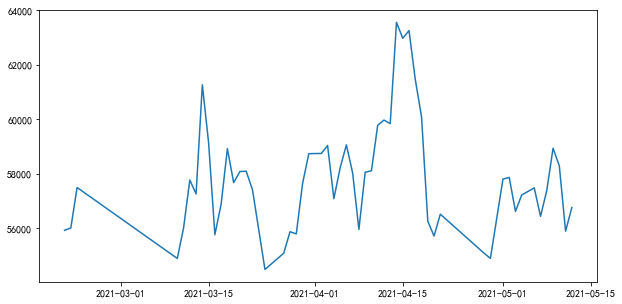

In [101]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(result['异常值时间'], result['异常值'])   

## 数据展示

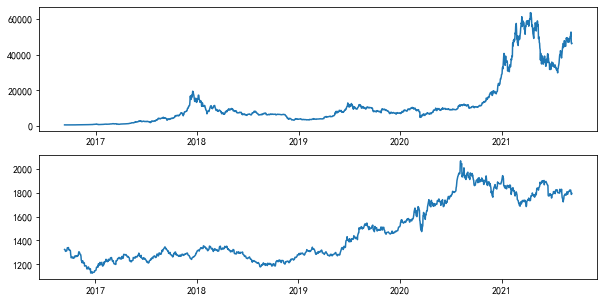

In [66]:
fig, ax = plt.subplots(2,1,figsize=(10,5))
ax[0].plot(Bitcoin.iloc[:,0], Bitcoin.iloc[:,1])
ax[1].plot(Gold.iloc[:,0], Gold.iloc[:,1])

# 常见指标
## BOLL布林线

In [68]:
def boll(data):
    # SMA:简单移动平均(Simple Moving Average)
    time_period = 20  # SMA的计算周期，默认为20
    stdev_factor = 2  # 上下频带的标准偏差比例因子
    history = []  # 每个计算周期所需的价格数据
    sma_values = []  # 初始化SMA值
    upper_band = []  # 初始化阻力线价格
    lower_band = []  # 初始化支撑线价格
    # 构造列表形式的绘图数据
    for close_price in data['Value']:
        history.append(close_price)
        # 计算移动平均时先确保时间周期不大于20
        if len(history) > time_period:
            del (history[0])

        # 将计算的SMA值存入列表
        sma = np.mean(history)
        sma_values.append(sma)
        # 计算标准差
        stdev = np.sqrt(np.sum((history - sma)**2) / len(history))
        upper_band.append(sma + stdev_factor * stdev)
        lower_band.append(sma - stdev_factor * stdev)
    data = data.assign(中界线=pd.Series(sma_values, index=data.index))
    data = data.assign(阻力线=pd.Series(upper_band, index=data.index))
    data = data.assign(支撑线=pd.Series(lower_band, index=data.index))
    return data


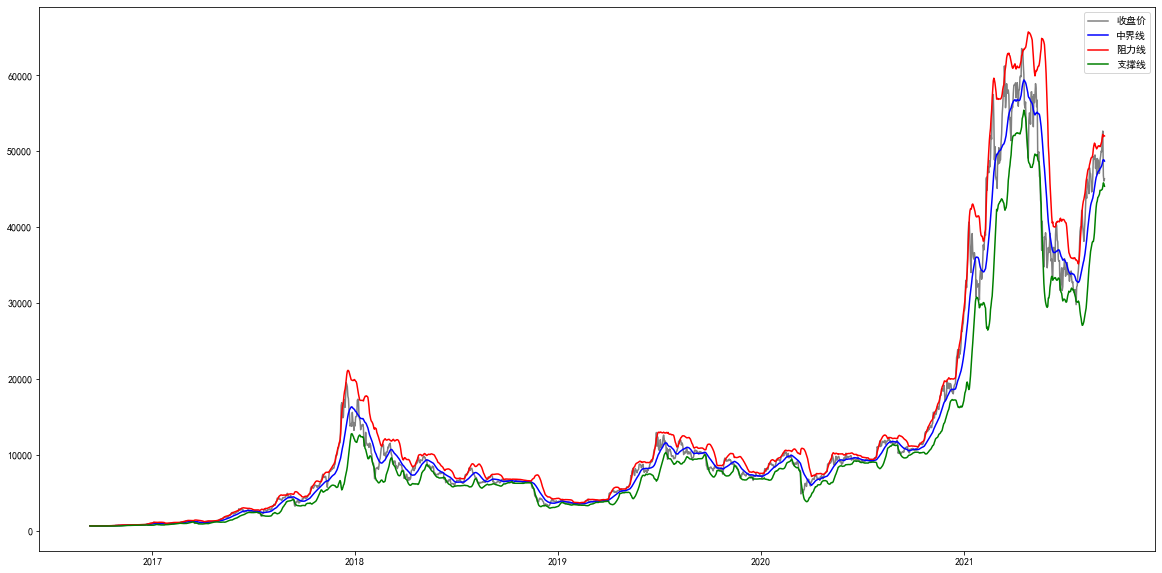

In [70]:
Bitcoin_Boll = Bitcoin.copy()
Bitcoin_Boll = boll(Bitcoin_Boll)
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Bitcoin_Boll['Date'], Bitcoin_Boll['Value'],label='收盘价',color='grey')
ax.plot(Bitcoin_Boll['Date'], Bitcoin_Boll['中界线'],label='中界线',color='blue')
ax.plot(Bitcoin_Boll['Date'], Bitcoin_Boll['阻力线'],label='阻力线',color='red')
ax.plot(Bitcoin_Boll['Date'], Bitcoin_Boll['支撑线'],label='支撑线',color='green')
ax.legend()

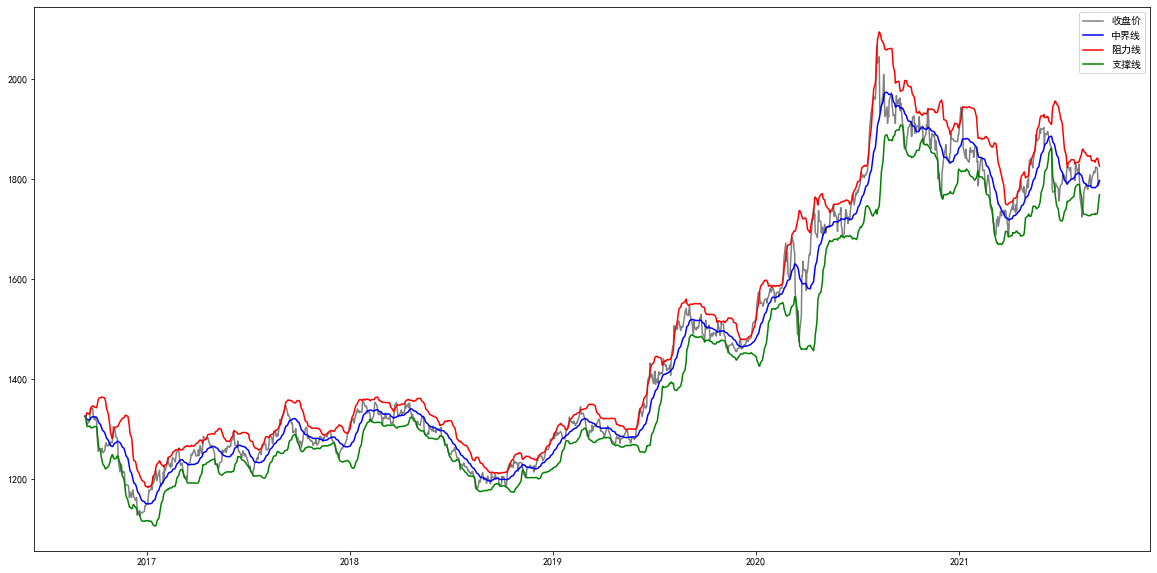

In [72]:
Gold_Boll = Gold.copy()
Gold_Boll = boll(Gold_Boll)
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Gold_Boll['Date'], Gold_Boll['Value'],label='收盘价',color='grey')
ax.plot(Gold_Boll['Date'], Gold_Boll['中界线'],label='中界线',color='blue')
ax.plot(Gold_Boll['Date'], Gold_Boll['阻力线'],label='阻力线',color='red')
ax.plot(Gold_Boll['Date'], Gold_Boll['支撑线'],label='支撑线',color='green')
ax.legend()

Date     False
Value    False
dtype: bool